In [25]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

In [26]:
def create_oracle_constant_0(qc, qubits):
    """創建常數函數 f(x) = 0 的預言機 (Oracle)"""
    pass

def create_oracle_constant_1(qc, qubits):
    """創建常數函數 f(x) = 1 的預言機 (Oracle)"""
    qc.x(qubits[-1])

def create_oracle_balanced(qc, qubits, pattern):
    n = len(qubits) - 1  
    
    for i in range(n):
        if pattern & (1 << i):
            qc.x(qubits[i])
    
    if n == 1:
        qc.cx(qubits[0], qubits[-1])
    elif n == 2:
        qc.ccx(qubits[0], qubits[1], qubits[-1])
    else:
        controls = qubits[:-1]
        target = qubits[-1]
        qc.mcx(controls, target)
    
    for i in range(n):
        if pattern & (1 << i):
            qc.x(qubits[i])

In [27]:
def deutsch_jozsa_algorithm(oracle_type, n_qubits=2, pattern=0):
    # 步驟1: 初始化 - 準備 n 個輸入量子位元和 1 個輔助量子位元
    qreg = QuantumRegister(n_qubits + 1, 'q')
    creg = ClassicalRegister(n_qubits, 'c')
    qc = QuantumCircuit(qreg, creg)
    
    # 初始化輔助量子位元為 |1⟩ (或 |−⟩ 狀態)
    qc.x(qreg[-1])
    """--------------------------分隔線-----------------------------"""
    # 步驟2: 施加 Hadamard 閘 - 創建均勻疊加態
    for i in range(n_qubits + 1):
        qc.h(qreg[i])
    
    qc.barrier()
    """--------------------------分隔線-----------------------------"""
    # 步驟3: 查詢量子黑箱函數 (Oracle) - 相位反饋發生
    if oracle_type == 'constant_0':
        create_oracle_constant_0(qc, qreg)
    elif oracle_type == 'constant_1':
        create_oracle_constant_1(qc, qreg)
    elif oracle_type == 'balanced':
        create_oracle_balanced(qc, qreg, pattern)
    
    qc.barrier()
    """--------------------------分隔線-----------------------------"""
    # 步驟4: 再次施加 Hadamard 閘 - 干涉效應
    for i in range(n_qubits):
        qc.h(qreg[i])
    """--------------------------分隔線-----------------------------"""
    # 步驟5: 測量 n 個輸入量子位元的最終狀態
    for i in range(n_qubits):
        qc.measure(qreg[i], creg[i])
    
    return qc

def run_experiment(oracle_type, n_qubits=2, pattern=0, shots=1024):
    """運行實驗並返回結果"""
    qc = deutsch_jozsa_algorithm(oracle_type, n_qubits, pattern)
    
    # 使用模擬器
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=shots).result()
    counts = result.get_counts()
    
    return qc, counts

qc1, counts1 = run_experiment('constant_0', n_qubits=2)
qc2, counts2 = run_experiment('constant_1', n_qubits=2)
qc3, counts3 = run_experiment('balanced', n_qubits=2, pattern=1)

In [28]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'Arial', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

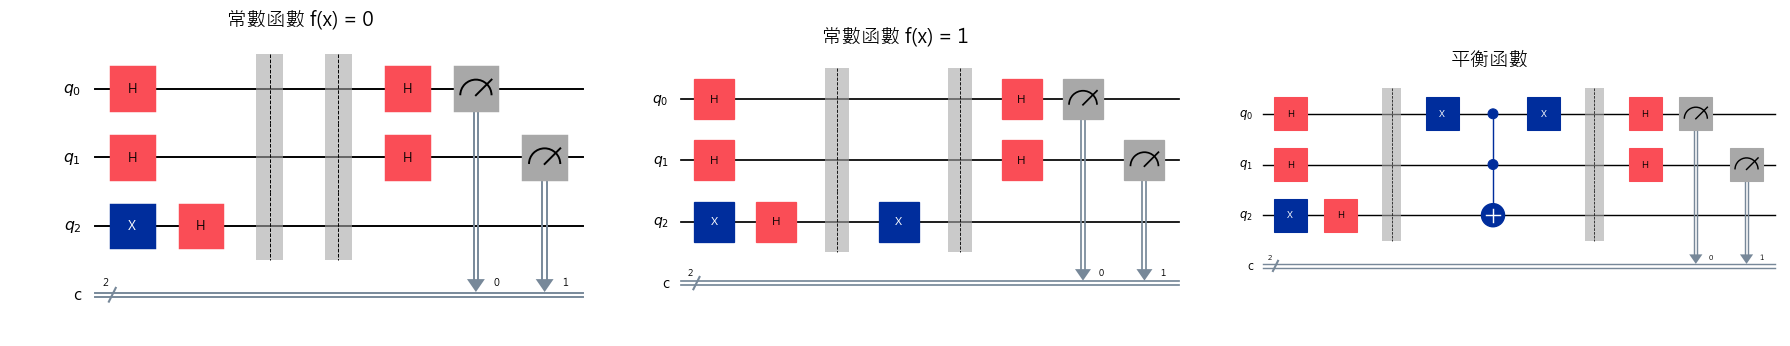

In [29]:
# 繪製量子電路圖
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

qc1.draw('mpl', ax=axes[0])
axes[0].set_title('常數函數 f(x) = 0', fontsize=14)

qc2.draw('mpl', ax=axes[1]) 
axes[1].set_title('常數函數 f(x) = 1', fontsize=14)

qc3.draw('mpl', ax=axes[2])
axes[2].set_title('平衡函數', fontsize=14)

plt.tight_layout()
plt.show()


【測量結果直方圖】


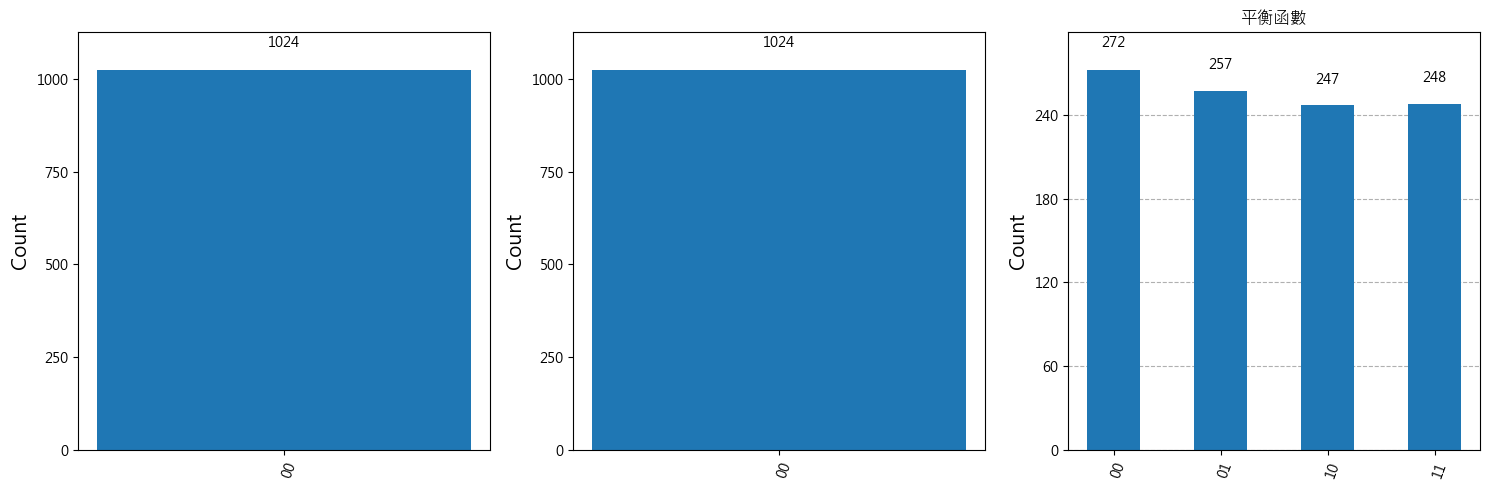


【結果比較圖】


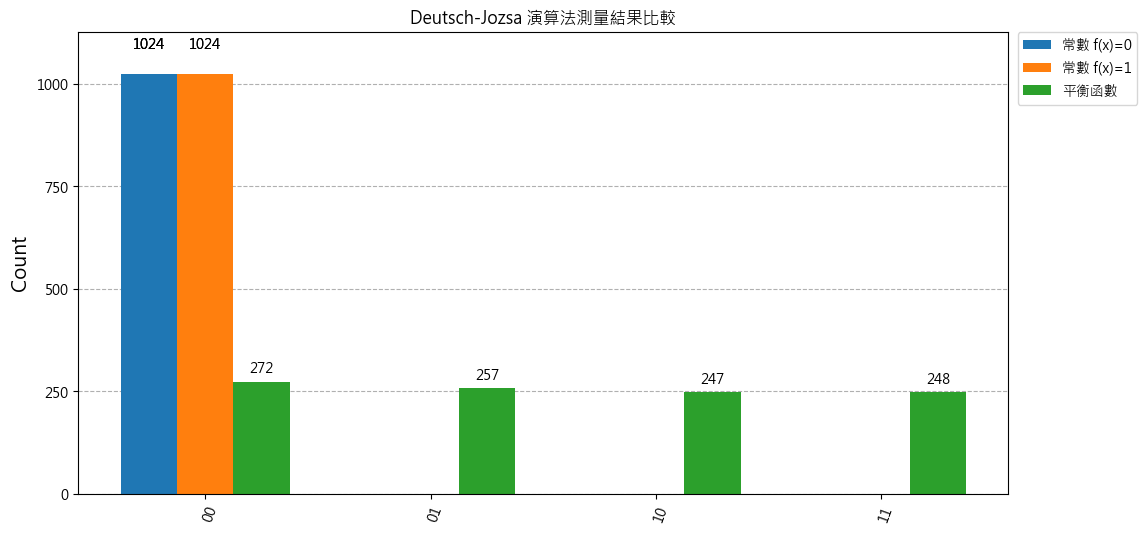

In [30]:
print("\n【測量結果直方圖】")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plot_histogram(counts1, ax=axes[0], title='常數函數 f(x) = 0')
plot_histogram(counts2, ax=axes[1], title='常數函數 f(x) = 1') 
plot_histogram(counts3, ax=axes[2], title='平衡函數')

plt.tight_layout()
plt.show()

print("\n【結果比較圖】")
fig, ax = plt.subplots(figsize=(12, 6))
plot_histogram([counts1, counts2, counts3], 
               legend=['常數 f(x)=0', '常數 f(x)=1', '平衡函數'],
               ax=ax,
               title='Deutsch-Jozsa 演算法測量結果比較')
plt.show()